In [4]:
install.packages("ggplot2")  
library(ggplot2)


The downloaded binary packages are in
	/var/folders/0l/0zk8gsv941318kd09xn3f20h0000gp/T//RtmpXT8wkf/downloaded_packages


In [5]:
# Read the dataset
df <- read.csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [6]:
# Convert Date column to Date type
df$Date <- as.Date(df$Date, format="%m/%d/%Y")

In [7]:
# Extract the year from the Date
df$Year <- as.integer(format(df$Date, "%Y"))

In [8]:
# Create custom 10-year intervals starting from 1908
start_year <- 1908
end_year <- max(df$Year) + 10  # Extend by 10 years beyond the last year in the dataset
bins <- seq(start_year, end_year, by = 10)

In [9]:
# Create labels like '1908-1918', etc.
labels <- paste(bins[1:(length(bins)-1)], bins[2:length(bins)], sep = "-")

In [10]:
# Create a new column 'Interval' for the 10-year intervals
df$Interval <- cut(df$Year, breaks = bins, labels = labels, right = FALSE)

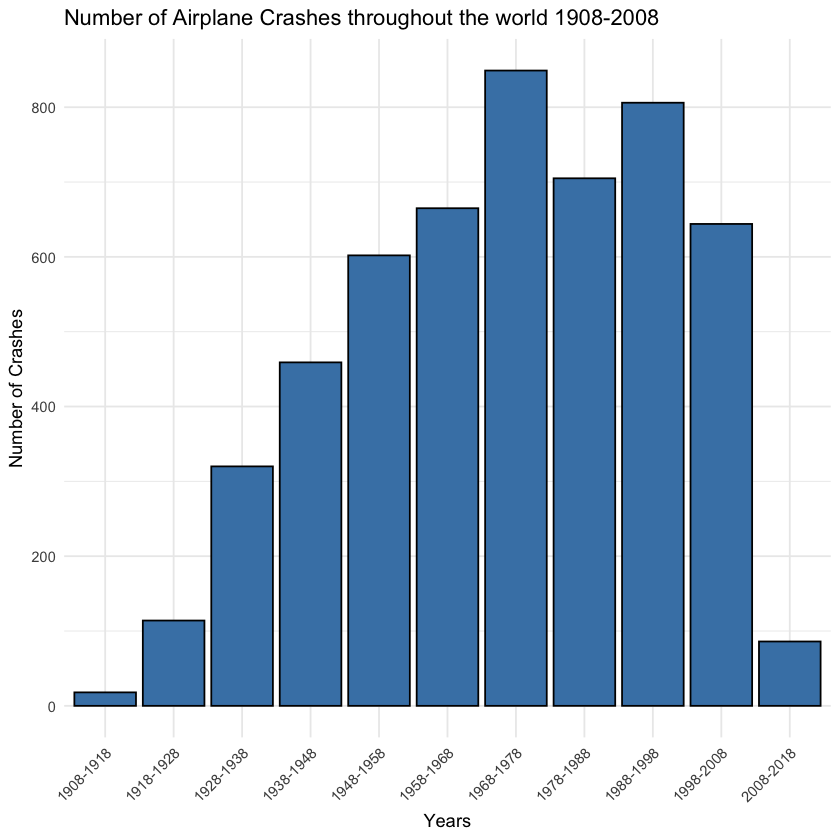

In [13]:
# Create the histogram using ggplot2
ggplot(df, aes(x = Interval)) +
  geom_bar(fill = "steelblue", color = "black") +
  theme_minimal() +
  labs(title = "Number of Airplane Crashes throughout the world 1908-2008",
       x = "Years",
       y = "Number of Crashes") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))